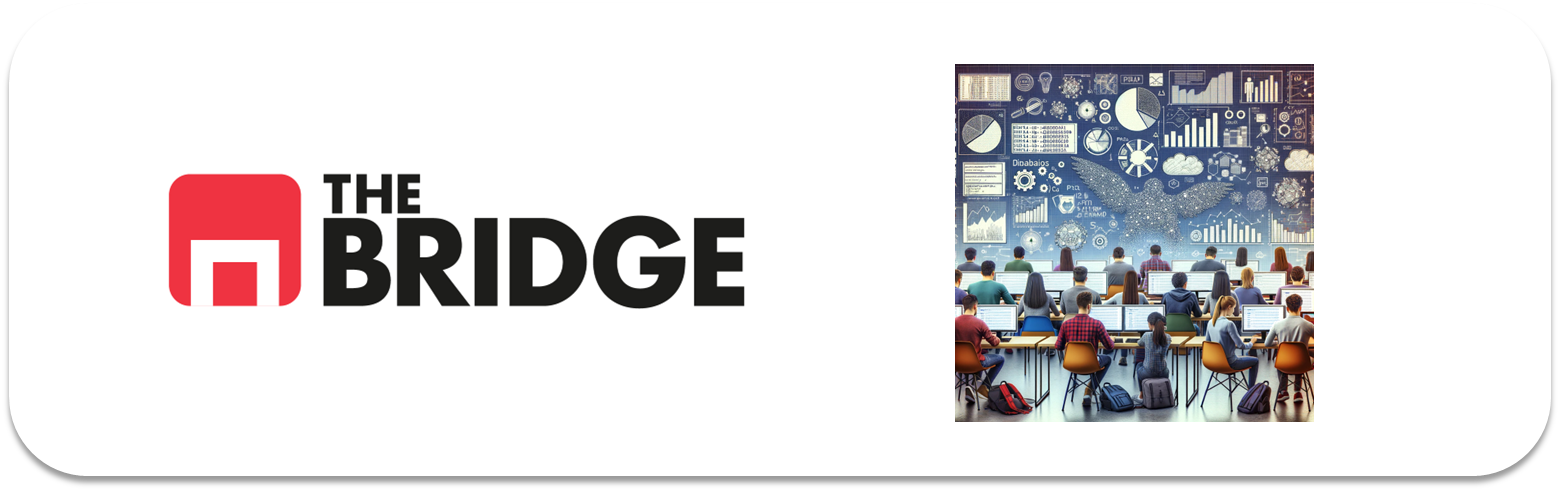

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
#1

dataset = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter='|')
dataset.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


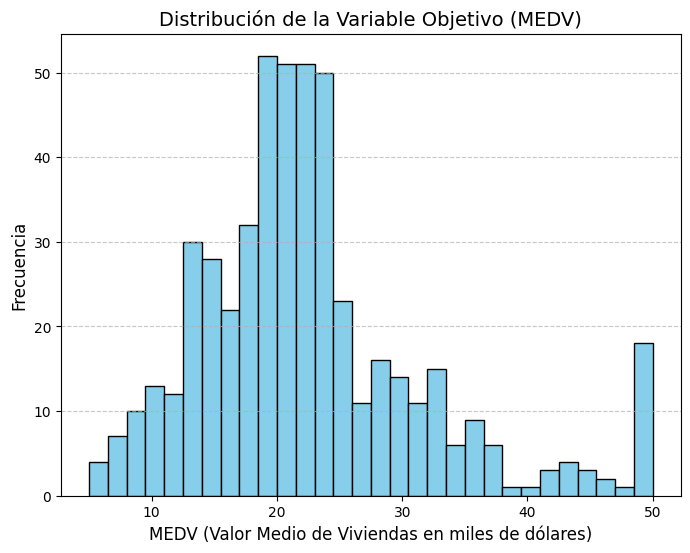

In [7]:
#2

plt.figure(figsize=(8, 6))
plt.hist(dataset['MEDV'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la Variable Objetivo (MEDV)', fontsize=14)
plt.xlabel('MEDV (Valor Medio de Viviendas en miles de dólares)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
medv_stats = dataset['MEDV'].describe()
medv_stats


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [10]:
#3

# Dividir los datos en variables predictoras (X) y objetivo (y)
X = dataset.drop(columns=['MEDV'])
y = dataset['MEDV']

# Dividir en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 12), (102, 12), (404,), (102,))

In [11]:
#4

X_train.columns, X_train.head()


(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'LSTAT'],
       dtype='object'),
          CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
 477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
 15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
 332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
 423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
 19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
 
      PTRATIO  LSTAT  
 477     20.2  24.91  
 15      21.0   8.47  
 332     16.9   7.83  
 423     20.2  23.29  
 19      21.0  11.28  )

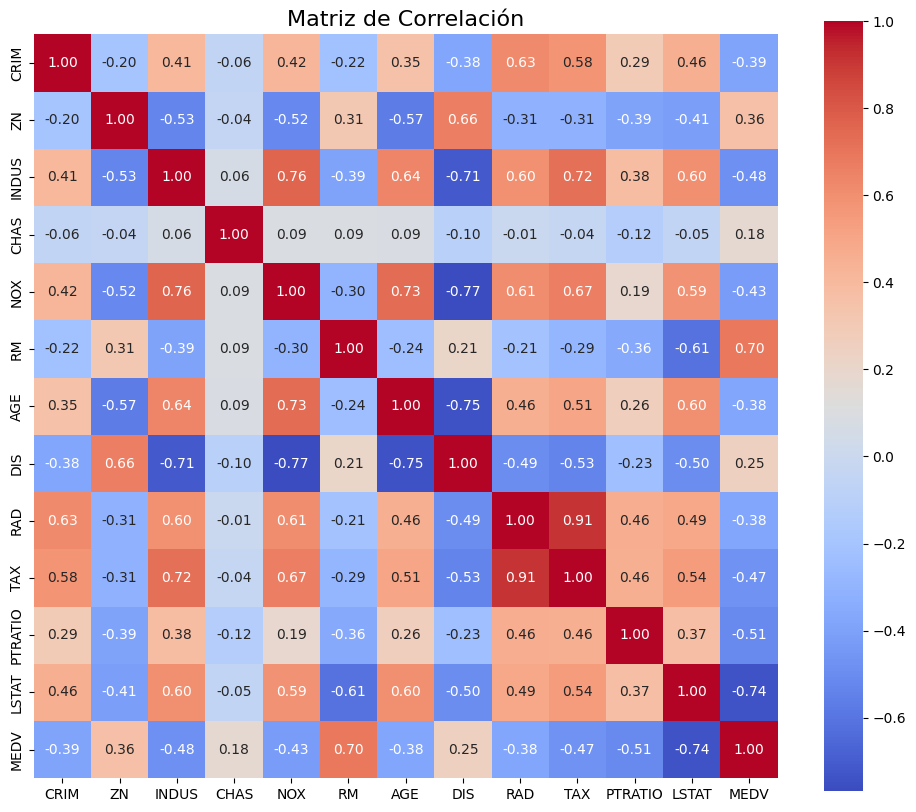

In [15]:
#5

# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [16]:
#6

# Selección de las características relevantes
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'DIS']

# Filtrar las características seleccionadas en los conjuntos de entrenamiento y prueba
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Convertir de vuelta a DataFrame para mantener los nombres de las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Mostrar un vistazo a los datos escalados
X_train_scaled.head()

,RM,LSTAT,PTRATIO,CRIM,DIS
0,-1.428069,1.753505,0.845343,1.287702,-0.802173
1,-0.680087,-0.561474,1.204741,-0.336384,0.324349
2,-0.402063,-0.651595,-0.637176,-0.403253,1.330697
3,-0.300450,1.525387,0.845343,0.388230,-0.839240
4,-0.831094,-0.165787,1.204741,-0.325282,-0.005494


In [18]:
#7

# Construir el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train_scaled, y_train)

# Coeficientes del modelo
coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': linear_model.coef_
})

# Mostrar los coeficientes
coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
0,RM,3.356382
3,CRIM,-1.031407
4,DIS,-1.447593
2,PTRATIO,-1.849334
1,LSTAT,-4.431079


In [20]:
#8

# Realizar predicciones en el conjunto de prueba
y_pred = linear_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
metrics = {
    "MAE (Error Absoluto Medio)": mae,
    "MSE (Error Cuadrático Medio)": mse,
    "RMSE (Raíz del ECM)": rmse,
    "R2 (Coeficiente de Determinación)": r2
}

metrics

{'MAE (Error Absoluto Medio)': 3.4171897970813245,
 'MSE (Error Cuadrático Medio)': 27.932263943788975,
 'RMSE (Raíz del ECM)': np.float64(5.285098290835183),
 'R2 (Coeficiente de Determinación)': 0.619107828069865}

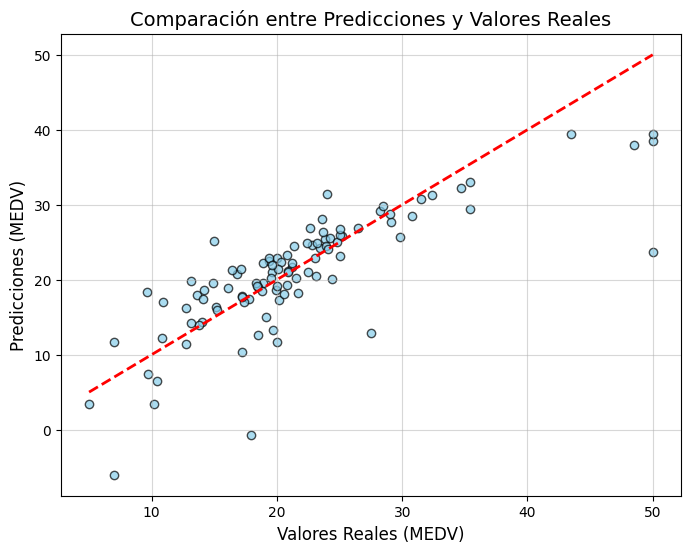

In [21]:
# Gráfica de comparación entre predicciones y valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Comparación entre Predicciones y Valores Reales', fontsize=14)
plt.xlabel('Valores Reales (MEDV)', fontsize=12)
plt.ylabel('Predicciones (MEDV)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [28]:
#9 

# Valores de alpha para Lasso
alphas = [0.1, 1.0, 10.0]
lasso_metrics = []

# Entrenar y evaluar Lasso para diferentes valores de alpha
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    # Calcular métricas
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    lasso_metrics.append({
        "Alpha": alpha,
        "MAE": mae_lasso,
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "R2": r2_lasso
    })

# Convertir resultados a DataFrame
lasso_results = pd.DataFrame(lasso_metrics)
print(lasso_results)

   Alpha       MAE        MSE      RMSE        R2
0    0.1  3.395047  27.550746  5.248880  0.624310
1    1.0  3.472249  27.412453  5.235690  0.626196
2   10.0  6.255844  75.045430  8.662877 -0.023341


In [29]:
#10

# Valores de alpha para Lasso
alphas = [0.1, 1.0, 10.0]
lasso_metrics = []

# Entrenar y evaluar Lasso para diferentes valores de alpha
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    # Calcular métricas
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    lasso_metrics.append({
        "Alpha": alpha,
        "MAE": mae_lasso,
        "MSE": mse_lasso,
        "RMSE": rmse_lasso,
        "R2": r2_lasso
    })

# Convertir resultados a DataFrame
lasso_results = pd.DataFrame(lasso_metrics)
print(lasso_results)

# Conclusión: Selección del mejor modelo
best_alpha = lasso_results.loc[lasso_results['R2'].idxmax(), 'Alpha']
best_model = Lasso(alpha=best_alpha, max_iter=10000)
best_model.fit(X_train_scaled, y_train)

print(f"\nEl mejor modelo Lasso tiene un alpha de {best_alpha}, con R2 de {lasso_results['R2'].max():.4f}")

   Alpha       MAE        MSE      RMSE        R2
0    0.1  3.395047  27.550746  5.248880  0.624310
1    1.0  3.472249  27.412453  5.235690  0.626196
2   10.0  6.255844  75.045430  8.662877 -0.023341

El mejor modelo Lasso tiene un alpha de 1.0, con R2 de 0.6262
